In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pm4py==2.1.4
!apt install -y graphviz
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading CSV file

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Process mining course/heart_log_val_0.csv')

In [ ]:
df.head()

,type,concept:name,value,time:timestamp,case:concept:name,case:gender,case:age,case:charlson,case:elixhauser,case:dob,case:dod,case:ethnicity,case:label,admission_id,PREDICT
0,lab,Sodium_mean_2,2.0,2166-07-23 17:03:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
1,lab,Sodium_std_0,0.0,2166-07-26 10:30:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN
2,admission,unplanned,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
3,admission,Medicare,NaN,2166-08-13 03:32:00+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,109185.0,NaN
4,lab,Sodium_mean_2,2.0,2166-08-13 03:32:10+00:00,283,M,76,1,36,2090-09-05 05:30:00+00:00,09-12-2166 00:00,WHITE,False,NaN,NaN


In [ ]:
event_type = df['type'].unique()
print(event_type)

['lab' 'admission' 'artificial' 'elix_comorb']


In [ ]:
event = df['concept:name'].unique()

In [ ]:
for i in event:
    print(i)

Sodium_mean_2
Sodium_std_0
unplanned
Medicare
Urea Nitrogen_mean_2
Sodium_std_2
Urea Nitrogen_std_2
event_0
event_2
event_3
event_6
event_9
event_11
event_14
event_15
event_16
event_19
event_20
event_26
event_29
CHF
OND
COAG
FED
Urea Nitrogen_mean_1
Urea Nitrogen_std_1
Private
Sodium_mean_3
Urea Nitrogen_mean_3
CARIT
VALV
PARA
Urea Nitrogen_std_4
Medicaid
PCD
HYPUNC
CPD
HYPOTHY
Sodium_std_1
NTproBNP_mean_9
NTproBNP_std_1
Sodium_std_3
Urea Nitrogen_std_3
Sodium_mean_1
DIABUNC
LD
WLOSS
ALCOHOL
PVD
NTproBNP_std_0
HYPC
RF
DEPRE
planned
Creatinine, Serum_mean_0
Creatinine, Serum_std_0
DRUG
BLANE
SOLIDTUM
NTproBNP_std_6
OBES
DIABC
Urea Nitrogen_mean_0
PUD
METACANC
DANE
Sodium_mean_4
Sodium_std_4
LYMPH
Urea Nitrogen_mean_4
Urea Nitrogen_std_0
PSYCHO
RHEUMD


 Converting csv file to xes file

In [ ]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter

In [ ]:
xes_exporter.apply(df, '/content/drive/My Drive/Process mining course/test.xes')

exporting log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

Inductive miner

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

In [ ]:
log = xes_importer.apply('/content/drive/My Drive/Process mining course/test.xes')
for thrd in ["0.3"]:
    net, initial_marking, final_marking = inductive_miner.apply(log, parameters={"NOISE_THRESHOLD": float(thrd)})
### Report Petri-net properties ###
print(float(thrd))
print("PN Places:", len(net.places))
print("PN Transitions:", len(net.transitions))

parsing log, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

0.3
PN Places: 93
PN Transitions: 148


Exporting PNML

In [ ]:
from pm4py.objects.petri.exporter import exporter as pnml_exporter
pnml_exporter.apply(net, initial_marking, "/content/drive/My Drive/Process mining course/test.pnml", final_marking=final_marking)

In [ ]:
from pm4py.objects.petri.importer import importer as pnml_importer
net, im, fm = pnml_importer.apply("/content/drive/My Drive/Process mining course/test.pnml")

In [ ]:
print("PN Places:", len(net.places))
print("\nPN Places:", list(net.places))
print("\nPN Transitions:", len(net.transitions))
print("\nPN Transitions:", list(net.transitions))

PN Places: 93

PN Places: [p_53, p_33, p_99, p_57, p_50, p_32, p_73, p_72, p_70, p_35, p_58, p_34, p_96, p_59, p_16, p_69, p_44, p_111, p_45, p_37, p_47, p_101, p_49, p_75, p_100, p_52, p_63, p_109, p_94, p_15, p_77, p_23, p_78, p_89, p_11, p_79, p_54, p_24, p_87, p_85, p_25, p_88, p_80, p_12, p_26, p_107, p_30, source, p_81, p_46, p_76, p_22, sink, p_92, p_105, p_82, p_90, p_95, p_51, p_83, p_93, p_5, p_13, p_60, p_91, p_31, p_84, p_39, p_6, p_64, p_67, p_8, p_36, p_10, p_74, p_27, p_17, p_86, p_18, p_65, p_7, p_62, p_106, p_40, p_98, p_110, p_41, p_97, p_103, p_68, p_55, p_104, p_42]

PN Transitions: 148

PN Transitions: [tauJoin_68, LYMPH, skip_63, skip_90, skip_50, skip_88, Urea Nitrogen_std_1, init_loop_16, skip_13, Urea Nitrogen_mean_4, skip_33, skip_64, skip_44, skip_69, NTproBNP_std_6, skip_18, skip_72, DANE, skip_39, skip_53, skip_93, Private, OBES, NTproBNP_mean_9, RF, skip_70, skip_61, FED, skip_14, skip_47, tauSplit_31, PSYCHO, skip_94, Urea Nitrogen_mean_0, tauJoin_32, tau

Petri Net

In [ ]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer
import graphviz

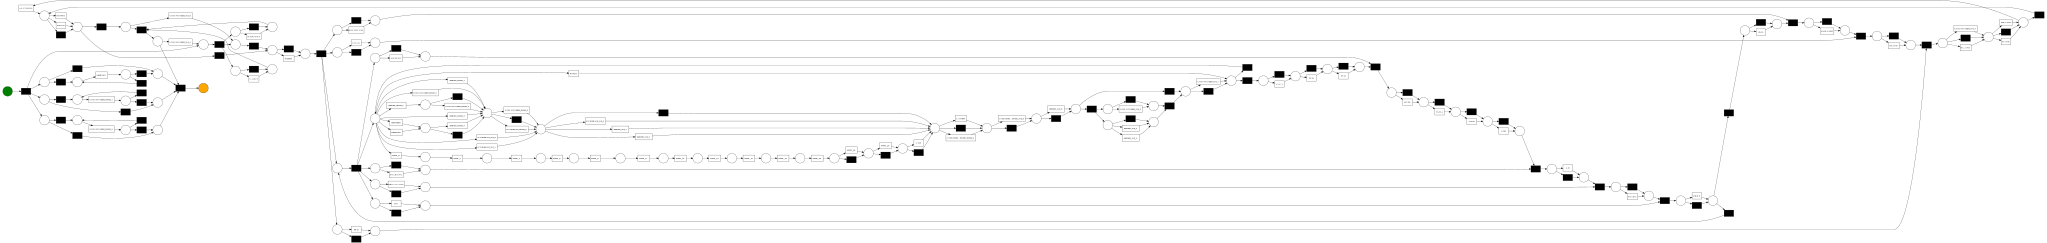

In [ ]:
gviz = pn_visualizer.apply(net, im, fm)
#pn_visualizer.view(gviz)
graphviz.Source(gviz)

In [ ]:
#conformance checking

Conformance checking

Precision

In [ ]:
from pm4py.evaluation.precision import evaluator as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

In [ ]:
print(prec)

0.03927961362040111


Fitness

In [ ]:
# Token based
from pm4py.evaluation.replay_fitness import evaluator as replay_fitness_evaluator
fitness_token = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

# Alignment based
#fitness_alignment = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)

In [ ]:
print(fitness_token)
#print(fitness_alignment)

{'perc_fit_traces': 20.512820512820515, 'average_trace_fitness': 0.9829050159621386, 'log_fitness': 0.984326802799035}
